In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates

register_matplotlib_converters()

In [19]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"])
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [20]:
print(df.columns)

Index(['date', 'value'], dtype='object')


In [21]:
# Clean data (Remove outliers).
df = df.loc[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [22]:
# DataFrame is converted to a NumPy array for numerical operations and analysis.
numpy_array = df.to_numpy()

In [23]:
# NumPy array indexing extracts values from columns.
# This code splits the data into two variables: dates and values.
dates = numpy_array[:, 0]
values = numpy_array[:, 1]

In [24]:
# The DataFrame is recreated to store results for further processing or exporting.
df = pd.DataFrame({'date': dates, 'value': values})
df

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [25]:
# Convert the 'date' column to datetime.
df['date'] = pd.to_datetime(df['date'])

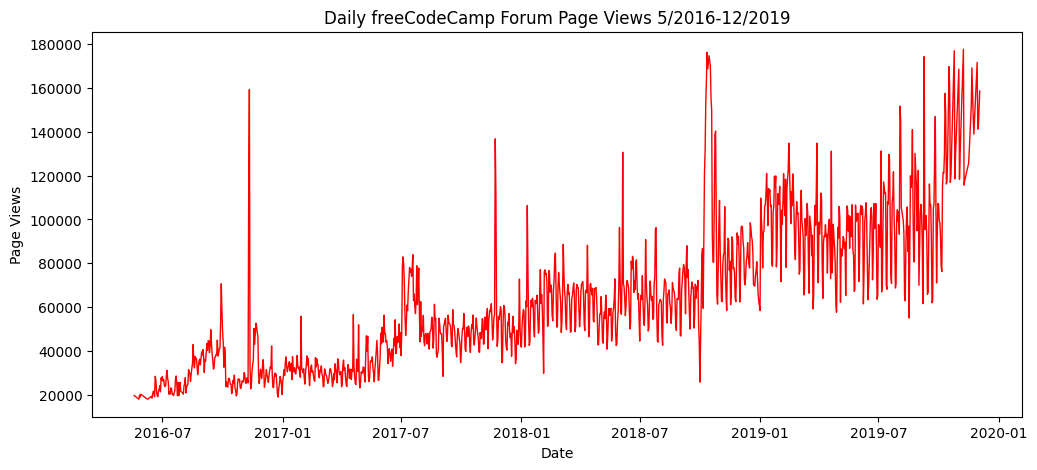

In [26]:
# Create a figure and axis with a specific size.
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data with a red line and specify the linewidth.
plt.plot(dates, values, "r", linewidth=1)

# Format the x-axis labels to display only year-month and every 6th month's dates.
date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator((1, 7)))

# Set the title and labels for the x and y axes.
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

fig.savefig('line_plot.png')

plt.show()

In [27]:
# Copy and modify data for monthly bar plot.
df_bar = df.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year
df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.4,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.16129,31113.071429,29369.096774,30878.733333,34244.290323,43577.5,65806.83871,47712.451613,47376.8,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.0,62693.774194,62350.833333,56562.870968,70117.0,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.5


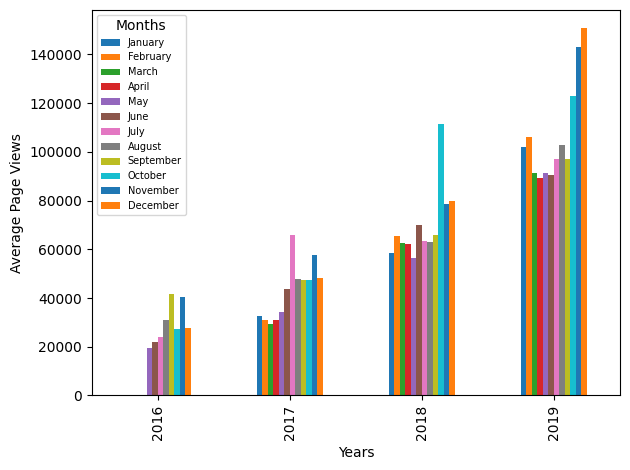

In [28]:
# Draw bar plot.
# Create a bar plot using the 'df_bar' DataFrame, and display the legend.
fig = df_bar.plot.bar(legend=True)

# Customize the legend labels and title.
fig.legend(['January', 'February', 'March', 
            'April', 'May', 'June', 'July', 
            'August', 'September', 'October', 
            'November', 'December'], prop={'size': 7}, title='Months')

# Set labels for the x and y axes.
plt.xlabel("Years")
plt.ylabel("Average Page Views")

# Ensure a tight layout for the plot.
plt.tight_layout()

# Get the figure object and save the plot as 'bar_plot.png'.
fig = fig.figure
fig.savefig('bar_plot.png')

In [29]:
# Prepare data for box plots.
# Create a copy of the original DataFrame 'df' and store it in 'df_box'.
df_box = df.copy()

# Reset the index of 'df_box' to have a continuous integer index.
df_box.reset_index(inplace=True)

# Extract the year from the 'date' column and store it in a new 'year' column.
df_box['year'] = [d.year for d in df_box.date]

# Extract the month abbreviation (e.g., 'Jan') from the 'date' column and store it in a new 'month' column.
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Display the modified 'df_box' DataFrame.
df_box

,index,date,value,year,month
0,0,2016-05-19,19736,2016,May
1,1,2016-05-26,18060,2016,May
2,2,2016-05-27,19997,2016,May
3,3,2016-05-28,19044,2016,May
4,4,2016-05-29,20325,2016,May
...,...,...,...,...,...
1233,1233,2019-11-24,138875,2019,Nov
1234,1234,2019-11-29,171584,2019,Nov
1235,1235,2019-11-30,141161,2019,Nov
1236,1236,2019-12-01,142918,2019,Dec


In [32]:
# This code adds a new 'num_of_month' column to 'df_box' with numeric month values extracted 
# from the 'date' column and sorts the DataFrame based on it to start with January.

# Extract the numeric month values from the 'date' column and store them in a new column 'num_of_month'
df_box["num_of_month"] = df_box["date"].dt.month

# Display the 'num_of_month' column (optional)
df_box["num_of_month"]

# Sort the DataFrame 'df_box' based on the 'num_of_month' column to order the months
df_box = df_box.sort_values("num_of_month")

df_box

,index,date,value,year,month,num_of_month
210,210,2017-01-06,37353,2017,Jan,1
593,593,2018-01-24,61700,2018,Jan,1
592,592,2018-01-23,62758,2018,Jan,1
572,572,2018-01-03,56013,2018,Jan,1
573,573,2018-01-04,58910,2018,Jan,1
...,...,...,...,...,...,...
902,902,2018-12-02,73710,2018,Dec,12
901,901,2018-12-01,62373,2018,Dec,12
921,921,2018-12-21,85083,2018,Dec,12
188,188,2016-12-15,42333,2016,Dec,12


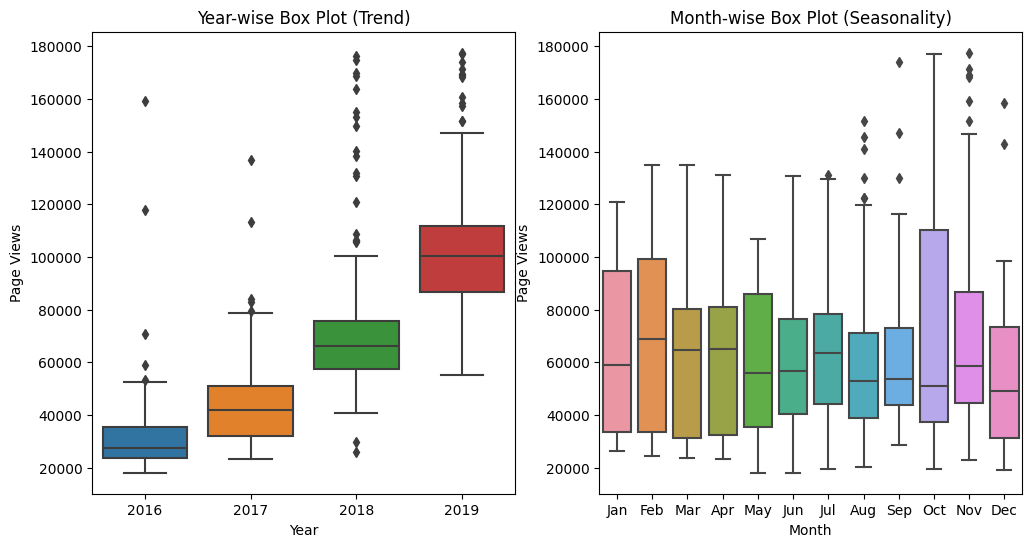

In [31]:
# Draw box plots (using Seaborn).
# Create a figure with two subplots side by side.
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Create a box plot for the 'year' column against the 'value' column.
axes[0] = sns.boxplot(ax=axes[0], data=df_box, x="year", y="value")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
axes[0].set_title("Year-wise Box Plot (Trend)")

# Create a box plot for the 'month' column against the 'value' column.
axes[1] = sns.boxplot(ax=axes[1], data=df_box, x="month", y="value")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
axes[1].set_title("Month-wise Box Plot (Seasonality)")

fig.savefig('box_plot.png')